# Estimating External Worker Identification Model

This notebook re-estimates ActivitySim external worker identification model in Larch. 

# Load libraries

In [1]:
import os
import larch  # !conda install larch -c conda-forge # for estimation
import pandas as pd
import numpy as np
from larch import P, X
import matplotlib.pyplot as plt

The directory with the estimation data bundles for tour mode choice.

In [2]:
os.chdir('/projects/SANDAG/2017 On-Call Modeling Services/Area B/TO 05 - ABM3/estimation/output/estimation_data_bundle/external_worker_identification')

# Drop duplicate person records

In [14]:
alts_combined_data = pd.read_csv("external_worker_identification_values_combined_orig.csv", dtype={'household_id': np.int64},low_memory=False)
#household_data = pd.read_csv("../override_households.csv",dtype={'household_id': np.int64})
#person_data = pd.read_csv("../override_persons.csv")
alts_combined_data.shape

(45439, 280)

In [4]:
#merge alts_combined data with person file
#alts_combined_per_data = pd.merge(alts_combined_data, person_data[['person_id','PNUM']], on=["person_id"], how='left')
#alts_combined_per_data.shape

In [5]:
#merge alts_combined data (with person file) with household file
#alts_combined_hh_data = pd.merge(alts_combined_data, household_data[['household_id','HH_ID']], on=["household_id"], how='left')
#alts_combined_hh_data.shape

In [15]:
#drop duplicate person records and merged columns
alts_combined_data = alts_combined_data.sort_values(by=['override_choice'])
alts_combined_new_data = alts_combined_data.drop_duplicates(subset=['HH_ID','PNUM'])
alts_combined_new_data = alts_combined_new_data[alts_combined_new_data['is_worker']==True]
#alts_combined_new_data = alts_combined_new_data.drop(columns=['household_id','PNUM','HH_ID'])
alts_combined_new_data.shape

(8074, 280)

In [16]:
pd.crosstab(alts_combined_new_data.closest_external_zone, alts_combined_new_data.override_choice, margins=True)

override_choice,0,1,All
closest_external_zone,,,
24323,0,2,2
24324,1,3,4
24325,2,30,32
24326,63,1137,1200
24327,28,499,527
24328,43,5143,5186
24329,9,1082,1091
24330,1,31,32
All,147,7927,8074


In [17]:
#write data to file
if os.path.exists("external_worker_identification_values_combined_orig.csv")!=True:
  shutil.copy2('external_worker_identification_values_combined.csv','external_worker_identification_values_combined_orig.csv')
alts_combined_new_data.to_csv("external_worker_identification_values_combined.csv", index=False)

# Load data and prep model for estimation

In [19]:
os.chdir('/projects/SANDAG/2017 On-Call Modeling Services/Area B/TO 05 - ABM3/estimation')
modelname = "external_worker_identification"

from activitysim.estimation.larch import component_model
model, data = component_model(modelname, return_data=True)

c:\development\projects\sandag_activitysim\activitysim\estimation\larch\simple_simulate.py:66: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(edb_directory, filename), **kwargs)


# Review data loaded from the EDB

The next step is to read the EDB, including the coefficients, model settings, utilities specification, and chooser and alternative data.

### Coefficients

In [20]:
data.coefficients

,value,constrain
coefficient_name,,
coef_dist_to_nearest_ext_station,0,F
coef_size_of_nearest_ext_station,0,F
coef_part_time,0,F
asc_external_worker,0,F
coef_agriculture,0,F
coef_business_srv,0,T
coef_construction,0,F
coef_education,0,F
coef_entertainment,0,F


#### Utility specification

In [21]:
data.spec

,Label,Description,Expression,work_external,work_internal
0,util_dist_to_nearest_ext_station,Distance to nearest external station,dist_to_external_zone,coef_dist_to_nearest_ext_station,NaN
1,util_size_of_nearest_ext_station,Size of nearest external station,"@reindex(land_use.external_work,df.closest_ext...",coef_size_of_nearest_ext_station,NaN
2,util_asc_placeholder,ASC to play with,1,asc_external_worker,NaN


## Explore data

In [22]:
data.chooser_data

,model_choice,override_choice,util_dist_to_nearest_ext_station,util_size_of_nearest_ext_station,util_child_age,util_income,util_person_type,util_industry,util_asc_placeholder,util_global_switch,...,household_density,population_density,employment_density,density_index,is_cbd,tot_collegeenroll,preschool_target,is_parking_zone,closest_external_zone,dist_to_external_zone
person_id,,,,,,,,,,,,,,,,,,,,,
34695,1,0,36.952385,8.519471,55,83991.25,1,0,1,1,...,11.551207,35.726685,4.670980,3.326029,False,0,640,True,24328,36.952385
88812,1,0,18.992023,8.519471,28,172795.00,1,0,1,1,...,40.005715,85.726532,34.647807,18.567246,True,0,298,True,24328,18.992023
29807,1,0,28.078810,10.756881,34,69521.25,0,0,1,1,...,0.000000,0.000000,0.000000,0.000000,False,0,0,True,24326,28.078810
7772,1,0,24.396740,10.051520,51,39222.50,0,0,1,1,...,2.712262,7.207930,0.705931,0.560141,False,0,213,True,24327,24.396740
11399,1,0,25.715353,10.756881,30,19843.75,1,0,1,1,...,8.484787,24.605882,0.127272,0.125391,False,0,583,True,24326,25.715353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31545,1,1,20.862137,8.519471,38,47496.25,0,0,1,1,...,10.192849,23.647409,0.000000,0.000000,False,0,116,True,24328,20.862137
31012,1,1,16.555700,8.519471,65,34871.25,0,0,1,1,...,58.364407,138.268059,49.100215,26.666496,True,0,809,True,24328,16.555700
30702,1,1,23.222313,10.756881,56,79143.75,0,0,1,1,...,0.000000,0.000000,4.667445,0.000000,False,0,0,True,24326,23.222313


In [23]:
pd.crosstab(data.chooser_data.closest_external_zone, data.chooser_data.override_choice, margins=True)

override_choice,0,1,All
closest_external_zone,,,
24323,0,2,2
24324,1,3,4
24325,2,30,32
24326,63,1137,1200
24327,28,499,527
24328,43,5143,5186
24329,9,1082,1091
24330,1,31,32
All,147,7927,8074


In [24]:
pd.crosstab(data.chooser_data.industry, data.chooser_data.override_choice, margins=True, normalize='index')

override_choice,0,1
industry,,
0,0.020000,0.980000
accomodation,0.000000,1.000000
agriculture,0.088889,0.911111
business_srv,0.018018,0.981982
construction,0.027397,0.972603
education,0.018921,0.981079
entertainment,0.024221,0.975779
food_srv,0.015873,0.984127
government,0.010256,0.989744


In [25]:
pd.crosstab(data.chooser_data.industry, data.chooser_data.override_choice, margins=True)

override_choice,0,1,All
industry,,,
0,3,147,150
accomodation,0,179,179
agriculture,4,41,45
business_srv,22,1199,1221
construction,16,568,584
education,20,1037,1057
entertainment,7,282,289
food_srv,4,248,252
government,2,193,195


In [26]:
data.chooser_data['external_worker'] = np.where(data.chooser_data["override_choice"]==1,0,1)

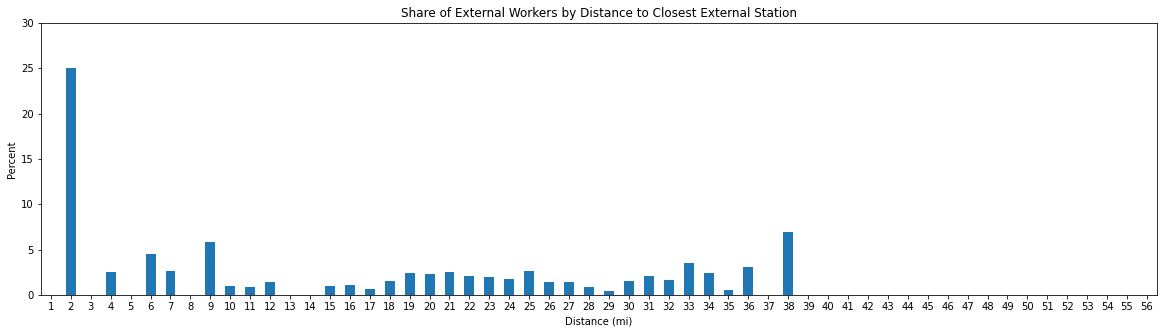

In [30]:
#plt.hist(data.chooser_data['distance_int'],range=(0, data.chooser_data['distance_int'].max()), bins=data.chooser_data['distance_int'].max() + 1)
data.chooser_data['distance_int']=data.chooser_data['util_dist_to_nearest_ext_station'].astype(int)
plot_df = data.chooser_data.groupby('distance_int')['external_worker'].mean().mul(100).reindex(range(data.chooser_data.distance_int.min()-1,data.chooser_data.distance_int.max()+1), fill_value=0)

ax = plot_df.plot(kind='bar',rot = 0,title='Share of External Workers by Distance to Closest External Station',ylim=[0, 30], xlabel="Distance (mi)", ylabel="Percent",  figsize=(20, 5))

plt.show()

In [31]:
chooser_data_lt1mi= data.chooser_data[data.chooser_data["distance_int"]<=2]
pd.crosstab(chooser_data_lt1mi.closest_external_zone, chooser_data_lt1mi.override_choice, margins=True)

override_choice,0,1,All
closest_external_zone,,,
24327,1,2,3
24328,0,1,1
All,1,3,4


# Set Coefficients

In [32]:
dir(model)
print(model.utility_co)

DictOfLinearFunction_C({0:   P.coef_dist_to_nearest_ext_station * X.util_dist_to_nearest_ext_station
+ P.coef_size_of_nearest_ext_station * X.util_size_of_nearest_ext_station
+ P.asc_external_worker * X.util_asc_placeholder, 1: <Empty LinearFunction_C>})


In [42]:
model.utility_co = {0: P.coef_dist_to_nearest_ext_station * X.util_dist_to_nearest_ext_station
+ P.coef_size_of_nearest_ext_station * X.util_size_of_nearest_ext_station
+ P.coef_part_time * X.parttime
+ P.coef_agriculture * X.agriculture
#+ P.coef_business_srv * X.business_srv
#+ P.coef_construction * X.construction
#+ P.coef_education * X.education
#+ P.coef_entertainment * X.entertainment
#+ P.coef_food_srv * X.food_srv                   
#+ P.coef_government * X.government
#+ P.coef_healthcare * X.healthcare                   
#+ P.coef_manufacturing * X.manufacturing
#+ P.coef_mgmt_srv * X.mgmt_srv
#+ P.coef_military * X.military
#+ P.coef_retail * X.retail    
+ P.coef_inc_lt15 * X("income<15000")
+ P.coef_inc_15_25 * X("(income>=15000) * (income<25000)") 
+ P.coef_inc_25_50 * X("(income>=25000) * (income<50000)") 
#+ P.coef_inc_100_150 * X.income_100_150 
+ P.coef_inc_150_250 * X("(income>=150000) * (income<250000)")  
+ P.coef_inc_250plus * X("income>=250000")
+ P.asc_external_2016 * X.year_2016         
+ P.coef_dist_lt_2p5 * X("util_dist_to_nearest_ext_station<2.5")                    
+ P.asc_external_worker * X.util_asc_placeholder, 1: 0}

# Estimate

With the model setup for estimation, the next step is to estimate the model coefficients.  Make sure to use a sufficiently large enough household sample and set of zones to avoid an over-specified model, which does not have a numerically stable likelihood maximizing solution.  Larch has a built-in estimation methods including BHHH, and also offers access to more advanced general purpose non-linear optimizers in the `scipy` package, including SLSQP, which allows for bounds and constraints on parameters.  BHHH is the default and typically runs faster, but does not follow constraints on parameters.

In [43]:
model.load_data()
#model.doctor(repair_ch_av="-")

req_data does not request avail_ca or avail_co but it is set and being provided
converting data_co to <class 'numpy.float64'>


In [44]:
model.maximize_loglike(method="SLSQP", options={"maxiter": 1000})


,value,initvalue,nullvalue,minimum,maximum,holdfast,note,best
asc_external_2016,0.994527,0.0,0.0,-inf,inf,0,,0.994527
asc_external_worker,-10.936681,0.0,0.0,NaN,NaN,0,,-10.936681
coef_agriculture,1.704536,0.0,0.0,-inf,inf,0,,1.704536
coef_dist_lt_2p5,2.783103,0.0,0.0,-inf,inf,0,,2.783103
coef_dist_to_nearest_ext_station,-0.038602,0.0,0.0,NaN,NaN,0,,-0.038602
coef_inc_150_250,0.810852,0.0,0.0,-inf,inf,0,,0.810852
coef_inc_15_25,-1.171175,0.0,0.0,-inf,inf,0,,-1.171175
coef_inc_250plus,1.238967,0.0,0.0,-inf,inf,0,,1.238967
coef_inc_25_50,-0.789220,0.0,0.0,-inf,inf,0,,-0.789220
coef_inc_lt15,-1.824624,0.0,0.0,-inf,inf,0,,-1.824624


C:\Users\joel.freedman\Anaconda3\envs\asim_est\lib\site-packages\larch\model\optimization.py:308: UserWarning: SLSQP may not play nicely with unbounded parameters
if you get poor results, consider setting global bounds with model.set_cap()
  warnings.warn( # infinite bounds # )


┣                x: asc_external_2016                    0.994527
┃                   asc_external_worker                -10.936681
┃                   coef_agriculture                     1.704536
┃                   coef_dist_lt_2p5                     2.783103
┃                   coef_dist_to_nearest_ext_station    -0.038602
┃                   coef_inc_150_250                     0.810852
┃                   coef_inc_15_25                      -1.171175
┃                   coef_inc_250plus                     1.238967
┃                   coef_inc_25_50                      -0.789220
┃                   coef_inc_lt15                       -1.824624
┃                   coef_part_time                       0.852871
┃                   coef_size_of_nearest_ext_station     0.766237
┃                   dtype: float64
┣          loglike: -654.3696083617982
┣        d_loglike: asc_external_2016                  -0.002868
┃                   asc_external_worker                 0.000274
┃                   coef_agriculture                   -0.000144
┃                   coef_dist_lt_2p5                    0.000200
┃                   coef_dist_to_nearest_ext_station   -0.004907
┃                   coef_inc_150_250                    0.000329
┃                   coef_inc_15_25                     -0.000635
┃                   coef_inc_250plus                   -0.000215
┃                   coef_inc_25_50                     -0.002897
┃                   coef_inc_lt15                      -0.000087
┃                   coef_part_time                     -0.002255
┃                   coef_size_of_nearest_ext_station    0.005134
┃                   dtype: float64
┣              nit: 31
┣             nfev: 55
┣             njev: 31
┣           status: 0
┣          message: 'Optimization terminated successfully'
┣          success: True
┣     elapsed_time: datetime.timedelta(seconds=6, microseconds=534334)
┣           method: 'SLSQP'
┣          n_cases: 8074
┣ iteration_number: 31
┣          logloss: 0.08104652072848628

### Estimated coefficients

In [47]:
model.calculate_parameter_covariance()
result_dir='/projects/SANDAG/2017 On-Call Modeling Services/Area B/TO 05 - ABM3/estimation/'
model.to_xlsx(
        result_dir+"ext_worker_id_003.xlsx", 
        data_statistics=True,
    )

C:\Users\joel.freedman\Anaconda3\envs\asim_est\lib\site-packages\larch\util\excel.py:523: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  xl = ExcelWriter(filename, engine='xlsxwriter_larch', model=model, **kwargs)


# Output Estimation Results

In [46]:
from activitysim.estimation.larch import update_coefficients
result_dir = data.edb_directory/"estimated"
update_coefficients(
    model, data, result_dir,
    output_file=f"{modelname}_coefficients_003.csv",
);

In [82]:
#larch.__version__

In [83]:
#result_dir

### Write the model estimation report, including coefficient t-statistic and log likelihood

# Next Steps

The final step is to either manually or automatically copy the `*_coefficients_revised.csv` file to the configs folder, rename it to `*_coefficients.csv`, and run ActivitySim in simulation mode.

In [84]:
#pd.read_csv(result_dir/f"{modelname}_coefficients_revised.csv")